----

## title: "Simulated EPSC generation"
## author: "Kim YG"
## date: "08 / Feb / 2022"

----

**Overview** <br>
This protocol has been used to simulate excitatory input from a population of unsynchronized neuron in [the paper](https://www.nature.com/articles/nature10360#Sec9) published on Nature in 2011. In the original paper, the authors noted: <br>
<br>
*...To study the effects of SSFO on sEPSC-spike rate information, we conducted whole-cell patch recordings from visually identified pyramidal cells in layer V of mPFC. Using current clamp, we stimulated a single pyramidal cell with a train of simulated EPSC waveforms. Individual sEPSC events had peak current magnitudes of 200 pA and decayed with a time constant of 2 ms. Each experiment was divided into 10 sweeps, each 10 seconds long and separated by 5 seconds to minimize rundown. Each sweep was divided into 500 ms segments. The total number of sEPSCs in each 500 ms segment was randomly chosen from a uniform distribution between 0 and 250. Then, the times of the sEPSCs within the 500 ms segment were randomly selected from a uniform distribution extending across the entire segment, simulating excitatory input from a population of unsynchronized neurons. Empirically, these stimulation parameters reliably drove pyramidal neurons at firing rates from 0 - 30 Hz (Supplementary Fig. 4c-e). In conditions marked as baseline, a 10 sec pulse of 590 nm light was delivered to completely inactivate the opsin before running the sEPSC protocol. In conditions where the opsin was activated, a 1 sec pulse of 470 nm light preceded the sEPSC protocol.* <br>
<br>
Here, I modified several parameters, such as peak current magnitude of sEPSC and the total number of sEPSCs in a 500 ms-long segement, to optimize the protocol for experiments in the mPFC. 

### 1. Assign initial values to parameters

In [57]:
A <- -0.000007 # -7000 nS
Tau1 <- 0.0005 # 0.5 ms
Tau2 <- 0.002 # 2 ms
SamplingRate <- 10000
Duration <- 0.01 #10 ms

### 2. Preparing the number and timepoints of events from uniform distribution

In [58]:
NOEinSegment <- round(runif(20, min = 0, max = 250)) #The number of events for a 500ms-long segment is drawn from uniform distribution.
TOEinSegment <- list()
for (i in 1:length(NOEinSegment)) {TOEinSegment[[i]] <- sort(runif(NOEinSegment[i], min = 0, max = 0.5))} #The Timepoint 

In [59]:
print(NOEinSegment)

 [1] 210  63 109 146 184 235 184 101  23 123 215 186  63 199 137 107  43 216 117
[20] 214


In [60]:
print(TOEinSegment)

[[1]]
  [1] 0.002718675 0.003450427 0.003853921 0.006067038 0.009580785 0.012623230
  [7] 0.013057599 0.018287789 0.018445897 0.019824471 0.020895253 0.021199857
 [13] 0.024857298 0.025198336 0.025294419 0.032633933 0.035807457 0.035825219
 [19] 0.038606977 0.039500498 0.040873529 0.043402247 0.047687536 0.053042878
 [25] 0.056840834 0.058709242 0.059123967 0.060705333 0.060804339 0.066714421
 [31] 0.067169708 0.067338469 0.069701976 0.075302128 0.077822904 0.081747524
 [37] 0.090097169 0.092735135 0.092754131 0.098785283 0.099112874 0.100939022
 [43] 0.101797517 0.106567511 0.111784265 0.113537450 0.124417283 0.125975658
 [49] 0.128015787 0.132935694 0.138151235 0.139642017 0.141812829 0.142522644
 [55] 0.142732106 0.143201171 0.147028315 0.148450713 0.149504264 0.151228152
 [61] 0.152048356 0.152250926 0.160078152 0.160295593 0.160832179 0.166257634
 [67] 0.168052490 0.168376402 0.170139915 0.171048956 0.175627713 0.175685383
 [73] 0.177127891 0.181503306 0.183050911 0.185606511 0.18

In [61]:
generateEPSC <- function(A, Tau1, Tau2, SamplingRate, Duration, RandomFactor) {  
    A_prime <- (Tau2^(Tau1/(Tau1-Tau2)))/Tau1
    
    t <- seq(from = 0, length.out = SamplingRate*Duration, by = 1/SamplingRate)
    
    SimulatedEPSC <- (A/A_prime)*(exp(-t/Tau1) + (-exp(-t/Tau2))) #positive-going events
    SimulatedEPSC <- c(0, SimulatedEPSC[-1])}

### 3. Generation of a single event 

In [62]:
oneEvent <- generateEPSC(A, 
                        Tau1, 
                        Tau2, 
                        SamplingRate, 
                        Duration, 
                        1)

### 4. Visualize the generated event

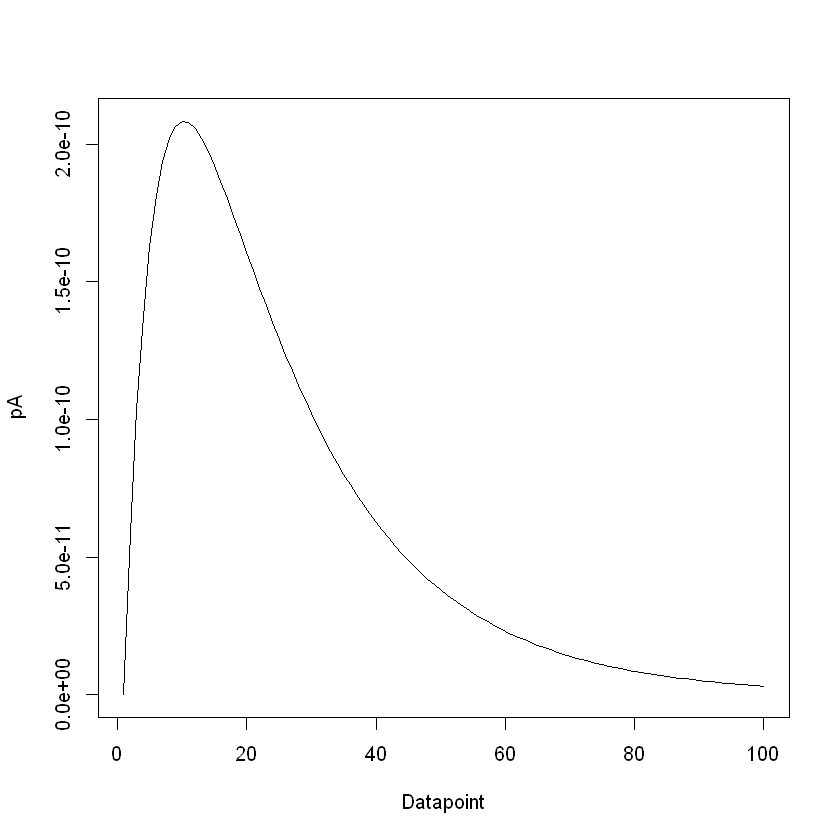

In [63]:
plot(1:length(oneEvent), oneEvent, type = "l", xlab="Datapoint", ylab="pA")

In [67]:
sweepdata <- list()
for(n in 1:20) {sweep <- rep(0, 5000) 
                sweepdata[[n]] <- sweep
               }

for(i in 1:20) {temp <- sweepdata[[i]]
                position <- round(TOEinSegment[[i]]*SamplingRate
                for (j in 1:NOEinSegment[i]) {temp <- replace(temp, position[j]:position[j]+99), oneEvent+temp[position[j]])}
                sweepdata[[i]] <- temp
                }
plot(x=1:length(unlist(sweepdata)), y=unlist(sweepdata), type="l", xlab="Datapoint", ylab="pA")

ERROR: Error in parse(text = x, srcfile = src): <text>:8:17: 예기치 않은 'for'입니다
7:                 position <- round(TOEinSegment[[i]]*SamplingRate
8:                 for
                   ^
